In [265]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import linear_reset
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Задание 1
___

__`Y`__ - потребление цыплят

__`X1`__ - среднедушевой доход

__`X2`__ - стоимость одного фунта цыплят

__`X3`__ - стоимость одного фунта свинины 

__`X4`__ - стоимость одного фунта говядины 

In [266]:
data = pd.read_excel('задание1.xlsx', index_col=0)

data.head()

,Y,X1,X2,X3,X4
t,,,,,
1,31.2,492.9,37.3,54.7,77.4
2,33.3,528.6,38.1,63.7,80.2
3,35.6,560.3,39.3,69.8,80.4
4,36.4,624.6,37.8,65.9,83.9
5,36.7,666.4,38.4,64.5,85.5


Добавлю необходимые в будущем столбцы:

In [267]:
ln_data = np.log(data)
ln_data.columns = ['ln_' + col for col in ln_data.columns]

ln_data.head()

,ln_Y,ln_X1,ln_X2,ln_X3,ln_X4
t,,,,,
1,3.440418,6.200306,3.618993,4.001864,4.348987
2,3.505557,6.270232,3.640214,4.154185,4.384524
3,3.572346,6.328472,3.671225,4.245634,4.387014
4,3.594569,6.437111,3.632309,4.188138,4.429626
5,3.602777,6.501890,3.648057,4.166665,4.448516


Полезно будет посмотреть корреляции регрессоров:

In [268]:
ln_data.corr()

,ln_Y,ln_X1,ln_X2,ln_X3,ln_X4
ln_Y,1.000000,0.968807,0.859015,0.894303,0.961366
ln_X1,0.968807,1.000000,0.941870,0.958683,0.987457
ln_X2,0.859015,0.941870,1.000000,0.983037,0.936052
ln_X3,0.894303,0.958683,0.983037,1.000000,0.947454
ln_X4,0.961366,0.987457,0.936052,0.947454,1.000000


Корреляция между регрессорами положительная и очень высокая. Знание этого может помочь с интерпретацией далее построенных моделей

## **Регрессии:**


### *1. Функция спроса:*
> 
> > $ \hat{Y} = b_0 * X_{2}^{b_2} $
>
> Прологарифмирую:
>
> >$ ln(\hat{Y}) = ln(b_0) + b_2 * ln(X_2) $
> 
> Замена:
> 
> > - $ \tilde{\hat{Y}} = ln(\hat{Y}) $
> >
> > - $ \tilde{b_0} = ln(b_0) $ 
> >
> > - $ \tilde{X_2} = ln(X_2) $ 
> >
> Тогда линейный вид уравнения:
> 
> > $ \tilde{\hat{Y}} = \tilde{b_0} + b_2 * \tilde{X_2} $ 

In [269]:
model_1 = smf.ols('ln_Y ~ ln_X2', data=ln_data).fit()

print(model_1.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.722    
Dependent Variable: ln_Y             AIC:                -41.0765 
Date:               2023-12-11 21:37 BIC:                -39.1876 
No. Observations:   19               Log-Likelihood:     22.538   
Df Model:           1                F-statistic:        47.86    
Df Residuals:       17               Prob (F-statistic): 2.49e-06 
R-squared:          0.738            Scale:              0.0061022
--------------------------------------------------------------------
               Coef.    Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept      1.5777     0.3105   5.0810   0.0001   0.9226   2.2328
ln_X2          0.5527     0.0799   6.9183   0.0000   0.3842   0.7213
------------------------------------------------------------------
Omnibus:              0.824         Durbin-Watson:           0.780
Pro

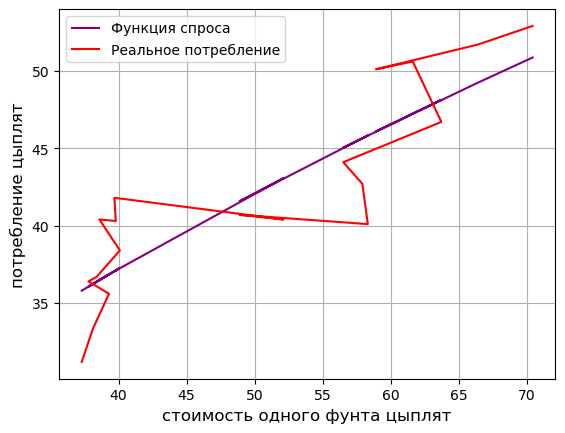

In [270]:
plt.plot(data.X2, np.exp(model_1.fittedvalues), color='purple', label='Функция спроса')
plt.plot(data.X2, data.Y, color='red', label='Реальное потребление')
plt.xlabel('стоимость одного фунта цыплят', fontsize=12)
plt.ylabel('потребление цыплят', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

**Выводы:**

- Регрессия в целом значима на любом разумном уровне значимости

- Коэффициент $ b_2 $ значим на любом разумном уровне значимости

- При увеличении стоимости одного фунта цыплят на 1%, потребление цыплят в Великобритании увеличивается на 0.5527%

- Спрос неэластичен, так как коэффициент эластичности по модулю меньше 1

- Поведение людей нестандартно. При увеличении стоимости, обычно, потребление уменьшается, а в нашем случае - увеличивается. 

> Возможным объяснением этого может быть отсутствие в уравнении других важных регрессоров (к примеру, цен на товары заменители), так как их отсутствие может привести к смещению коэффициента $b_2$. Если между включенным и невключенным "важным" регрессором существует сильная положительная корреляция, коэффициент будет смещён вверх. Возможно, в данном случае он смещён вверх настолько, что стал положительным

- 72% общей вариативности логарифма потребления цыплят описывается логарифмом стоимости одного фунта цыплят

### *2. Функция потребления:*
>
> > $ \hat{Y} = b_0 * X_{1}^{b_1} $ 
> 
> Прологарифмирую:
>
> > $ ln(\hat{Y}) = ln(b_0) + b_1 * ln(X_1) $
>
> Замена:
>
> > - $ \tilde{\hat{Y}} = ln(\hat{Y}) $
> >
> > - $ \tilde{b_0} = ln(b_0) $ 
> >
> > - $ \tilde{X_1} = ln(X_1) $ 
>
> Тогда линейный вид уравнения:
>
> > $ \tilde{\hat{Y}} = \tilde{b_0} + b_1 * \tilde{X_1} $ 

In [271]:
model_2 = smf.ols('ln_Y ~ ln_X1', data=ln_data).fit()

print(model_2.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.935    
Dependent Variable: ln_Y             AIC:                -68.6468 
Date:               2023-12-11 21:37 BIC:                -66.7579 
No. Observations:   19               Log-Likelihood:     36.323   
Df Model:           1                F-statistic:        259.8    
Df Residuals:       17               Prob (F-statistic): 9.84e-12 
R-squared:          0.939            Scale:              0.0014299
--------------------------------------------------------------------
              Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept     1.7460     0.1229   14.2043   0.0000   1.4867   2.0053
ln_X1         0.2849     0.0177   16.1186   0.0000   0.2476   0.3222
------------------------------------------------------------------
Omnibus:              0.699         Durbin-Watson:           0.753
Pro

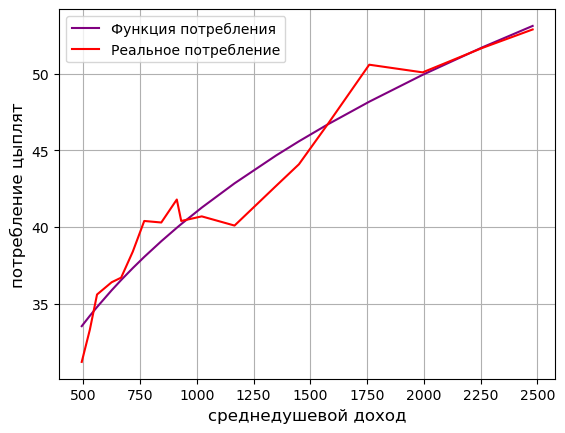

In [272]:
plt.plot(data.X1, np.exp(model_2.fittedvalues), color='purple', label='Функция потребления')
plt.plot(data.X1, data.Y, color='red', label='Реальное потребление')
plt.xlabel('среднедушевой доход', fontsize=12)
plt.ylabel('потребление цыплят', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

**Выводы:**

- Регрессия в целом значима на любом разумном уровне значимости

- Коэффициент $ b_1 $ значим на любом разумном уровне значимости

- При увеличении среднедушевого дохода на 1%, потребление цыплят в Великобритании увеличивается на 0.2849%

- Потребление неэластично, так как коэффициент эластичности по модулю меньше 1

- Результаты логичны. При росте среднедушевого дохода потребление должно увеличиваться

- 93.5% общей вариативности логарифма потребления цыплят описывается логарифмом стоимости одного фунта цыплят, что выше, чем в модели спроса

### *3. Функция спроса-потребления:*
>
> > $ \hat{Y} = b_0 * X_{1}^{b_1} * X_{2}^{b_2} $
>
> Прологарифмирую:
>
> > $ ln(\hat{Y}) = ln(b_0) + b_1 * ln(X_1) + b_2 * ln(X_2)$
>
> Замена:
>
> > - $ \tilde{\hat{Y}} = ln(\hat{Y}) $
> >
> > - $ \tilde{b_0} = ln(b_0) $ 
> >
> > - $ \tilde{X_1} = ln(X_1) $ 
> >
> > - $ \tilde{X_2} = ln(X_2) $ 
>
> Тогда линейный вид уравнения:
>
> > $ \tilde{\hat{Y}} = \tilde{b_0} + b_1 * \tilde{X_1} + b_2 * \tilde{X_2}$ 

In [273]:
model_3 = smf.ols('ln_Y ~ ln_X1 + ln_X2', data=ln_data).fit()

print(model_3.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.959     
Dependent Variable: ln_Y             AIC:                -76.7525  
Date:               2023-12-11 21:37 BIC:                -73.9192  
No. Observations:   19               Log-Likelihood:     41.376    
Df Model:           2                F-statistic:        213.7     
Df Residuals:       16               Prob (F-statistic): 2.87e-12  
R-squared:          0.964            Scale:              0.00089256
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
Intercept    2.0185     0.1267   15.9370   0.0000    1.7500    2.2870
ln_X1        0.4161     0.0416   10.0113   0.0000    0.3280    0.5043
ln_X2       -0.3048     0.0909   -3.3517   0.0041   -0.4976   -0.1120
------------------------------------------------------

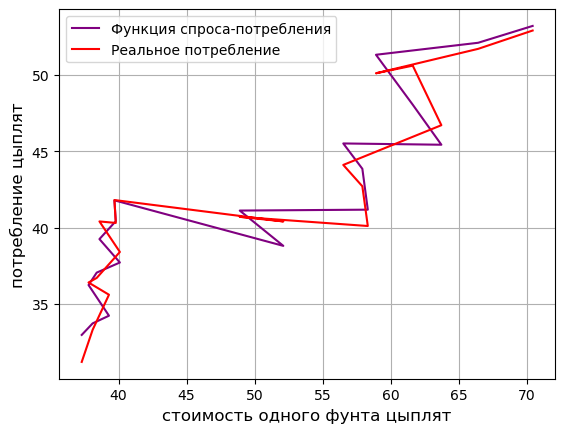

In [274]:
plt.plot(data.X2, np.exp(model_3.fittedvalues), color='purple', label='Функция спроса-потребления')
plt.plot(data.X2, data.Y, color='red', label='Реальное потребление')
plt.xlabel('стоимость одного фунта цыплят', fontsize=12)
plt.ylabel('потребление цыплят', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

**Выводы:**

- Сама регрессия, как и все коэффициенты в ней - значима.

- При неизменной стоимости цыплят, при увеличении среднедушевого дохода на 1%, потребление цыплят увеличивается на 0.42%

- При неизменном среднедушевом доходе, при увеличении стоимости цыплят на 1%, потребление цыплят уменьшается на 0.3%

> Как только мы добавили в модель со стоимостью цыплят среднедушевой доход, коэффициент при стоимости цыплят стал ниже нуля. Это объясняется тем, что рост цены на цыплят в среднем сопровождается ростом среднедушевого дохода (присутствует положительная корреляция). Если этот среднедушевой доход не фиксировать, может получиться так, что при росте цен, среднедушевой доход увеличивается ещё сильнее, что приводит к увеличению потребления цыплят. Модель функции спроса, построенная ранее, говорит, что обычно так и происходит, так как коэффициент при стоимости цыплят в ней положительный.

- Эта модель описывает 0.964% изменений дисперсии исходного признака, что говорит о том, что эта модель на данный момент является самой эффективной

### *4. Функция спроса с учётом цены на товары-заменители:*
>
> > $ \hat{Y} = b_0 * X_{2}^{b_2} * X_{3}^{b_3} * X_{4}^{b_4} $
>
> Прологарифмирую:
>
> > $ ln(\hat{Y}) = ln(b_0) + b_2 * ln(X_2) + b_3 * ln(X_3) + b_4 * ln(X_4)$
>
> Замена:
>
> > - $ \tilde{\hat{Y}} = ln(\hat{Y}) $
> >
> > - $ \tilde{b_0} = ln(b_0) $ 
> >
> > - $ \tilde{X_2} = ln(X_2) $ 
> >
> > - $ \tilde{X_3} = ln(X_3) $ 
> >
> > - $ \tilde{X_4} = ln(X_4) $ 
>
> Тогда линейный вид уравнения:
>
> > $ \tilde{\hat{Y}} = \tilde{b_0} + b_2 * \tilde{X_2} + b_3 * \tilde{X_3} + b_4 * \tilde{X_4} $ 

In [275]:
model_4 = smf.ols('ln_Y ~ ln_X2 + ln_X3 + ln_X4', data=ln_data).fit()

print(model_4.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.935    
Dependent Variable: ln_Y             AIC:                -67.1206 
Date:               2023-12-11 21:37 BIC:                -63.3429 
No. Observations:   19               Log-Likelihood:     37.560   
Df Model:           3                F-statistic:        87.74    
Df Residuals:       15               Prob (F-statistic): 9.73e-10 
R-squared:          0.946            Scale:              0.0014227
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept       2.3152    0.2215  10.4501  0.0000   1.8430   2.7874
ln_X2          -0.4875    0.2110  -2.3102  0.0355  -0.9372  -0.0377
ln_X3           0.2374    0.1556   1.5256  0.1479  -0.0943   0.5691
ln_X4           0.4601    0.0753   6.1120  0.0000   0.2996   0.6205
------

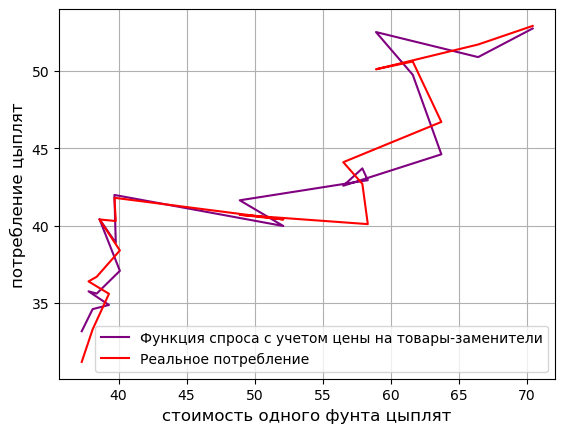

In [276]:
plt.plot(data.X2, np.exp(model_4.fittedvalues), color='purple', label='Функция спроса с учетом цены на товары-заменители')
plt.plot(data.X2, data.Y, color='red', label='Реальное потребление')
plt.xlabel('стоимость одного фунта цыплят', fontsize=12)
plt.ylabel('потребление цыплят', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

**Выводы:**

- Модель в целом значима. Коэффициент при стоимости цыплят - значим на уровне значимости 5%, при стоимости свинины - не значим на уровне 5%, а коэффициент при стоимости говядины - значим на любом разумном уровне значимости

- Мы видим, что потребление цыплят, при прочих неизменных условиях, с изменением стоимости одного фунта на 1%, уменьшается на 0.48%, когда при увеличении стоимости свинины и говядины на 1% - растёт на 0.23% и 0.46% соответственно при прочих равных

> Также положительный коэффициент для функции спроса может объяснятся тем, что при повышении стоимости цыплят, цены на товары-заменители возрастают еще более значительно (присутствует сильная положительная корреляция). Это приводит к ситуации, когда с увеличением цен на цыплят их потребление не уменьшается, а, напротив, возрастает, так как они остаются относительно более дешевым выбором по сравнению с другими продуктами

- Доля объяснённой дисперсии для этой модели равна 0.93, что говорит о том, что потребление зависит больше от среднедушевого дохода, чем от стоимости товаров-заменителей (при том, что их цена тоже важна), так как для модели функции спроса-потребления $R^2_{adj}$ был выше

## **Тест Шапиро-Уилка:**

$H_0$ - данные нормально распределены

$H_1$ - данные распределены ненормально

In [277]:
for var in data.drop(columns=['Y']).columns:
    print('p-value for', var, 'is', stats.shapiro(data[var])[1])

p-value for X1 is 0.04197002574801445
p-value for X2 is 0.008054640144109726
p-value for X3 is 0.04003702849149704
p-value for X4 is 0.01952611841261387


 На уровне значимости 5% ни одна из переменных не имеет нормального распределения 

## **Преобразование Бокса-Кокса:**

In [278]:
data_boxcox = pd.DataFrame()
for var in data.drop(columns=['Y']).columns: 
    data_boxcox[var] = stats.boxcox(data[var])[0]

data_boxcox.head()

,X1,X2,X3,X4
0,2.795503,1.192043,2.523566,1.574717
1,2.806068,1.193245,2.578226,1.577477
2,2.814698,1.194966,2.610052,1.577668
3,2.830396,1.192800,2.590128,1.580898
4,2.839513,1.193684,2.582613,1.582304


## **Критерий Манна-Уитни:**

$H_0$ - выборки однородны

$H_1$ - выборки неоднородны

In [279]:
stats.mannwhitneyu(data_boxcox.X2, data_boxcox.X3)

MannwhitneyuResult(statistic=0.0, pvalue=1.4798065133032065e-07)

Видно, что на любом разумном уровне значимости гипотеза об однородности выборок отклоняется. 

Это говорит о том, что распределение стоимостей одного фунта свинины образуется по другим законам относительно распределения стоимости одного фунта говядины

## **Критерий Флигнера-Клипера:**

$H_0$ - дисперсии двух выборок гомогенны

$H_1$ - дисперсии двух выборок отличны друг от друга

In [280]:
stats.fligner(data_boxcox.X2, data_boxcox.X3)

FlignerResult(statistic=17.56785668435604, pvalue=2.7723506703585003e-05)

Различия в дисперсиях статистически значимы на любом разумном уровне значимости. Это говорит о том, что разброс стоимости одного фунта цыплят не равен разбросу стоимости одного фунта свинины

Так как критерий Стьюдента требует гомогенности дисперсий, воспользуюсь его модификацией - тестом Уэлча, который не требует предположения о равенстве диперсий между сравниваемыми группами 

$H_0$ - средняя стоимость одного фунта цыплят РАВНА средней стоимости одного фунта свинины

$H_1$ - средняя стоимость одного фунта цыплят НЕ РАВНА средней стоимости одного фунта свинины

In [281]:
stats.ttest_ind(data_boxcox.X2, data_boxcox.X3, equal_var=False)

Ttest_indResult(statistic=-59.12265456715974, pvalue=2.1814249054774826e-22)

На любом разумном уровне значимости, гипотеза о равенстве средних двух групп отклоняется

In [282]:
print(f'''
средняя стоимость одного фунта цыплят: {data.X2.mean()}, 
средняя стоимость одного фунта свинины: {data.X3.mean()}
''')


средняя стоимость одного фунта цыплят: 49.67368421052631, 
средняя стоимость одного фунта свинины: 98.27368421052631



Разница между этими средними СТАТИСТИЧЕСКИ ЗНАЧИМА. Можно сказать, что фунт свинины в среднем дороже фунта цыплят

# Задание 2
---

__`profitability`__ - прибыльность вложений в оборудование (%) 

__`staff`__ - среднее число сотрудников на один проект 

__`projects`__ - среднемесячное число проектов

__`adverts`__ - доля расходов на рекламу и продвижение своего бренда (%)

In [283]:
data = pd.read_excel('задание2.xlsx')

data.head()

,staff,adverts,projects,profitability
0,8.768088,24.515827,8.499298,142.095390
1,9.129025,27.002612,7.414980,123.296482
2,8.269365,25.496132,6.524985,110.811052
3,9.838063,18.273113,5.211359,90.649576
4,10.382268,11.992892,7.973063,84.343632


In [284]:
def check_polynomial(X, y):
    
    degree = []
    r2_list = []
    r2_adj_list = []

    i = 1
    while True:
        
        X_poly = PolynomialFeatures(degree=i).fit_transform(X)

        n = X_poly.shape[0]
        k = X_poly.shape[1]

        if k > 100:
            break

        model = LinearRegression().fit(X_poly, y)

        r2 = model.score(X_poly, y)
        r2_adj = 1 - (1 - r2) * (n - 1) / (n - k)

        degree.append(i)
        r2_list.append(r2)
        r2_adj_list.append(r2_adj)

        i += 1
    
    result = pd.DataFrame(
        {
            'Степень полинома': degree,
            'r2': r2_list,
            'r2_adj': r2_adj_list
        }
    )

    return result

cp = check_polynomial(data.drop(columns=['profitability']), data.profitability)

sns.lineplot()

,Степень полинома,r2,r2_adj
0,1,0.756501,0.740620
1,2,0.912502,0.892814
2,3,0.960651,0.935730
3,4,0.966790,0.891513
4,5,1.000000,1.000000
5,6,1.000000,1.000000


Нужно ли вообще менять спецификацию модели? Проведу RESET тест Рамсея

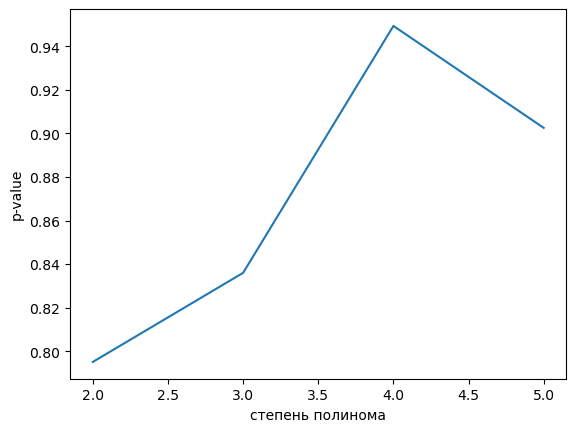

In [285]:
model = smf.ols('profitability ~ staff + adverts + projects', data=data).fit()

p_values = []
for i in range(2, 6):
    p_values.append(linear_reset(model, use_f=True, power=i).pvalue)

plt.plot(range(2, 6), p_values)
plt.xlabel('степень полинома')
plt.ylabel('p-value')
plt.show()

Для всех доступных степеней полиномов, результаты теста говорят о том, что значимой информации в них нет (недостаточно оснований отклонить нулевую гипотезу). 